In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [3]:
#Loading csv files into datasets
movies_ds = pd.read_csv("C:\\Users\\ASUS\\Downloads\\movies.csv")
ratings_ds = pd.read_csv("C:\\Users\\ASUS\\Downloads\\ratings.csv")
tags_ds = pd.read_csv("C:\\Users\\ASUS\\Downloads\\tags.csv")
links_ds = pd.read_csv("C:\\Users\\ASUS\\Downloads\\links.csv")

In [4]:
# 1) The number of csv files available in the dataset are - 4

In [5]:
#Finding shape of movies dataset
movies_ds.shape

(9742, 3)

In [6]:
# 2) The shape of movies.csv is (9742,3)

In [7]:
#Finding shape of ratings dataset
ratings_ds.shape

(100836, 4)

In [8]:
# 3) The shape of movies.csv is (100836, 4)

In [9]:
#Finding number of unique user ids in ratings dataset
count = ratings_ds['userId'].nunique()

In [10]:
print(count)

610


In [ ]:
# 4) The number of unique user ids in rating dataset - 610

In [21]:
# 5) The movie with maximum number of user ratings
ratings_count = ratings_ds['movieId'].value_counts()
max_ratings_movie_id = ratings_count.idxmax()
max_ratings_movie_title = movies_ds.loc[movies_ds['movieId'] == max_ratings_movie_id, 'title'].values[0]
print(f"The movie that received the maximum number of user ratings is: {max_ratings_movie_title}")

The movie that received the maximum number of user ratings is: Forrest Gump (1994)


In [22]:
# 6) Tags submitted by users to "Matrix, The (1999)"
matrix_movie_id = movies_ds.loc[movies_ds['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = tags_ds.loc[tags_ds['movieId'] == matrix_movie_id, 'tag']
unique_matrix_tags = matrix_tags.unique()
print(f"Tags for 'Matrix, The (1999)': {unique_matrix_tags}")

Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [12]:
Terminator_2_Judgment_Day_1991_Id = 589
ratings = ratings_ds[ratings_ds['movieId']==Terminator_2_Judgment_Day_1991_Id] 
avg_rating = ratings['rating'].mean()

In [33]:
print(f"The average user rating for 'Terminator 2: Judgment Day (1991) is {avg_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991) is 3.97


In [23]:
# 7) The average rating of "Terminator 2: Judgment Day (1991)" - 3.97098214

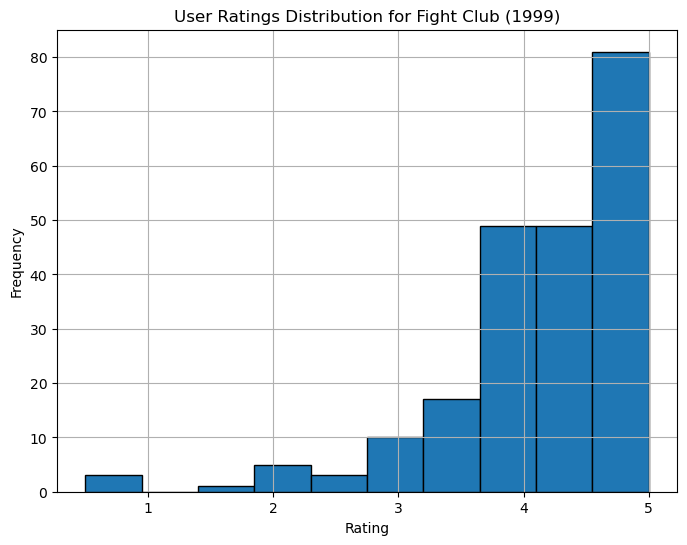

In [25]:
# 8) data distribution of user ratings for "Fight Club (1999)"
import matplotlib.pyplot as plt
fight_club_movie_id = movies_ds.loc[movies_ds['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = ratings_ds.loc[ratings_ds['movieId'] == fight_club_movie_id, 'rating']
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
# 8) data distribution of user ratings for "Fight Club (1999)" - Right Skewed

In [30]:
# Mandatory Operations
# 1) Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
grouped_ratings = ratings_ds.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
merged_data = pd.merge(grouped_ratings, movies_ds, on='movieId', how='inner')
# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).
filtered_movies = merged_data[merged_data['count'] > 50]

In [31]:
print(filtered_movies)

      movieId  count      mean                             title  \
0           1    215  3.920930                  Toy Story (1995)   
1           2    110  3.431818                    Jumanji (1995)   
2           3     52  3.259615           Grumpier Old Men (1995)   
5           6    102  3.946078                       Heat (1995)   
6           7     54  3.185185                    Sabrina (1995)   
...       ...    ...       ...                               ...   
8287   106782     54  3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52  3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73  3.993151               Interstellar (2014)   
8457   112852     59  4.050847    Guardians of the Galaxy (2014)   
8673   122904     54  3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [32]:
# The most popular movie based on  average user ratings
if not filtered_movies.empty:
    highest_rated_movies = filtered_movies[filtered_movies['mean'] == filtered_movies['mean'].max()]['title']
    print(f"The most popular movie(s) based on average user ratings is/are:")
    for movie in highest_rated_movies:
        print(movie)
else:
    print("No movies in the dataset have more than 50 user ratings.")

The most popular movie(s) based on average user ratings is/are:
Shawshank Redemption, The (1994)


In [34]:
# top 5 popular movies based on number of user ratings.
sorted_movies = filtered_movies.sort_values(by='count', ascending=False)
top_5_popular_movies = sorted_movies.head(5)
print("The top 5 popular movies based on number of user ratings:")
for movie_title in top_5_popular_movies['title']:
    print(movie_title)

The top 5 popular movies based on number of user ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [35]:
# "third most popular" movie based on the number of user ratings
# Filter for Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by rating count in descending order
sorted_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False)

# Identify the third most popular Sci-Fi movie based on rating count
if len(sorted_sci_fi) >= 3:
    third_most_popular_sci_fi = sorted_sci_fi.iloc[2]  # Third entry in zero-based index
    print(f"The third most popular Sci-Fi movie based on number of user ratings is: {third_most_popular_sci_fi['title']}")
else:
    print("There are not enough Sci-Fi movies with more than 50 ratings to determine the third most popular.")

The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993)
